# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constant

In [2]:
DATASET_PATH = "/kaggle/input/weather-underground/weather_data.csv"

# Code

In [3]:
df = pd.read_csv(DATASET_PATH)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

start_date = '2024-01-01'
df = df[(df['date'] >= start_date)]
df.head(3)

,date,time,temperature,dew_point,humidity,wind,wind_speed,wind_gust,pressure,precip,condition,city,country
1462,2024-01-01,10:00 PM,64,37,37,ENE,5,0,29.98,0.0,Haze,Karachi,Pakistan
1444,2024-01-01,1:00 PM,79,41,26,NNE,5,0,29.95,0.0,Haze,Karachi,Pakistan
1445,2024-01-01,1:30 PM,79,37,23,NNE,5,0,29.95,0.0,Haze,Karachi,Pakistan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7238 entries, 1462 to 8621
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         7238 non-null   datetime64[ns]
 1   time         7238 non-null   object        
 2   temperature  7238 non-null   int64         
 3   dew_point    7238 non-null   int64         
 4   humidity     7238 non-null   int64         
 5   wind         7224 non-null   object        
 6   wind_speed   7238 non-null   int64         
 7   wind_gust    7238 non-null   int64         
 8   pressure     7238 non-null   float64       
 9   precip       7238 non-null   float64       
 10  condition    7238 non-null   object        
 11  city         7238 non-null   object        
 12  country      7238 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 791.7+ KB


### 1. Check central tendancy

In [5]:
mean_temp = df['temperature'].mean()
median_temp = df['temperature'].median()
mode_temp = df['temperature'].mode()[0]  # Mode can have multiple values, take the first

print(f"Mean Temperature: {mean_temp}")
print(f"Median Temperature: {median_temp}")
print(f"Mode Temperature: {mode_temp}")

Mean Temperature: 77.35355070461453
Median Temperature: 79.0
Mode Temperature: 77


In [6]:
df.describe()

,date,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precip
count,7238,7238.000000,7238.000000,7238.000000,7238.000000,7238.0,7238.000000,7238.0
mean,2024-03-16 11:58:48.378005248,77.353551,56.236806,52.798011,8.204615,0.0,29.751727,0.0
min,2024-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,2024-02-07 00:00:00,70.000000,45.000000,38.000000,5.000000,0.0,29.690000,0.0
50%,2024-03-17 00:00:00,79.000000,59.000000,53.000000,7.000000,0.0,29.840000,0.0
75%,2024-04-24 00:00:00,86.000000,68.000000,70.000000,12.000000,0.0,29.950000,0.0
max,2024-05-31 00:00:00,106.000000,81.000000,94.000000,37.000000,0.0,31.780000,0.0
std,NaN,11.020076,14.680373,20.899017,4.698127,0.0,1.319771,0.0


### 2. Perform Outliers

In [7]:
# Calculate IQR for AverageTemperature
Q1 = df['temperature'].quantile(0.25)
Q3 = df['temperature'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['temperature'] >= lower_bound) & (df['temperature'] <= upper_bound)]

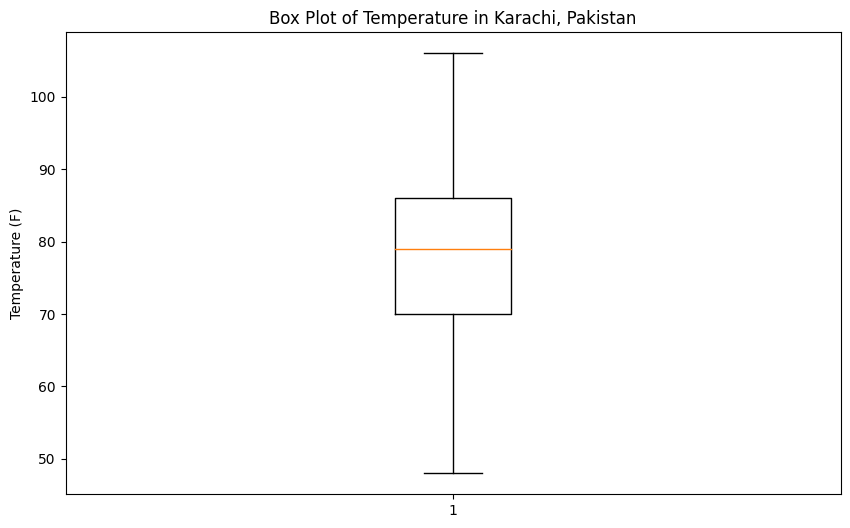

In [8]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['temperature'].dropna())  # Drop NaN values if any
plt.title('Box Plot of Temperature in Karachi, Pakistan')
plt.ylabel('Temperature (F)')
plt.show()

### 3. Scatter Plot

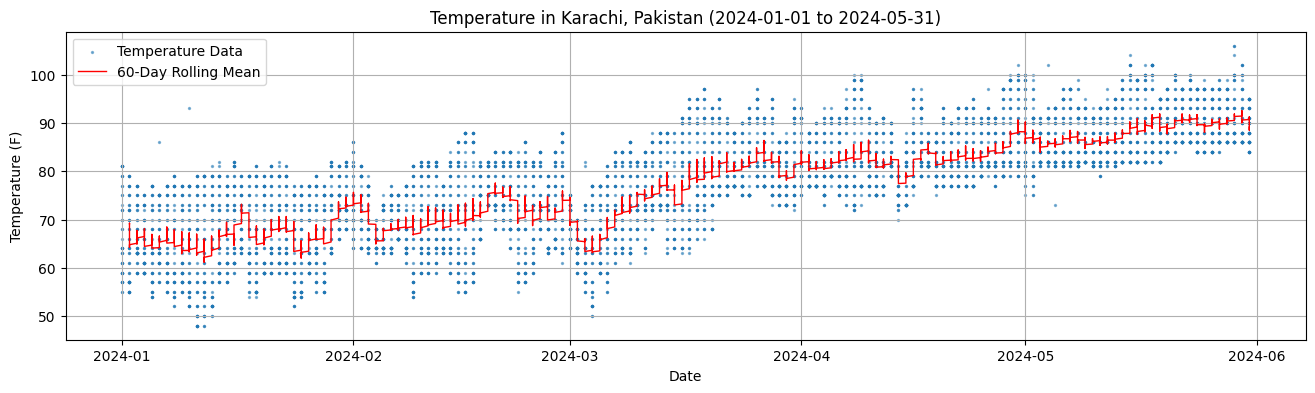

In [9]:
# Calculate the rolling mean with a window size, e.g., 60 days
rolling_mean = df['temperature'].rolling(window=60).mean()

# Plot the scatter plot
plt.figure(figsize=(16, 4))
plt.scatter(df['date'], df['temperature'], s=2, alpha=0.5, label='Temperature Data')
plt.plot(df['date'], rolling_mean, color='red', label='60-Day Rolling Mean', linewidth=1)
plt.title('Temperature in Karachi, Pakistan (2024-01-01 to 2024-05-31)')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.legend()
plt.show()